In [ ]:
#|default_exp downloader

# How to make sense of thousands of data files?  

> Answer: import fairdatanow  

Here is the thing. Our colleagues in the Falnama project team worked hard and so far uploaded several thousands of data files to our *Nextcloud* self-hosted open source cloud storage. Many of these files are formatted  and stored in such a way that it is difficult or impossible to explore them. It is our task as developers in the team to build and apply data processing algorithms in order to visualize our data in such a way that we can actually start to ask interdisciplinary questions and get answers!

In [ ]:
from fairdatanow import DataViewer
import matplotlib.pyplot as plt 
import os
import numpy as np 

In [ ]:
configuration = {
    'url': "https://laboppad.nl/falnama-project", 
    'user':    os.getenv('NC_AUTH_USER'),
    'password': os.getenv('NC_AUTH_PASS')
}

filters = {'columns': ['path', 'size', 'modified', 'ext'],
 'extensions': [],
 'search': '',
 'show_directories': False,
 'show_filters': False, 
 'use_regex': False}

In [ ]:
dv = DataViewer(configuration, **filters)

In [ ]:
dv

DataViewer(bytes_amount=np.int64(222927280116), columns=['path', 'size', 'modified', 'ext'], data=                                                   path       size    ext  \
0                                      falnama-project/  207.6 GiB          
1                   falnama-project/.attachments.12065/  749.2 KiB          
2     falnama-project/.attachments.12065/Falnama_por...  749.2 KiB   .jpg   
3                 falnama-project/01. KEY INFO Project/  207.3 MiB          
4     falnama-project/01. KEY INFO Project/1991-6-18...   26.6 MiB   .pdf   
...                                                 ...        ...    ...   
8109                falnama-project/OPENDATA/xrays.html    2.7 MiB  .html   
8110                          falnama-project/README.md  642 Bytes    .md   
8111                      falnama-project/Uploadfolder/   22 Bytes          
8112     falnama-project/Uploadfolder/firstdownload.txt   22 Bytes   .txt   
8113  falnama-project/filetree-laboppad-falnama_2025...  496.2 KiB   .txt   

         byte_size                  modified  isdir  
0     222927280116 2025-09-25 09:20:43+00:00   True  
1           767156 2024-10-11 08:28:52+00:00   True  
2           767156 2024-10-11 08:28:52+00:00  False  
3        217415181 2025-09-17 12:57:53+00:00   True  
4         27843171 2022-10-07 09:41:35+00:00  False  
...            ...                       ...    ...  
8109       2796717 2025-08-01 11:19:27+00:00  False  
8110           642 2025-02-05 10:02:18+00:00  False  
8111            22 2025-07-23 09:55:21+00:00   True  
8112            22 2025-07-22 09:10:09+00:00  False  
8113        508080 2025-05-08 08:20:33+00:00  False  

[8114 rows x 6 columns], extensions=[], filtered_data=                                                   path       size  \
2     falnama-project/.attachments.12065/Falnama_por...  749.2 KiB   
4     falnama-project/01. KEY INFO Project/1991-6-18...   26.6 MiB   
5     falnama-project/01. KEY INFO Project/1996-2-20...   30.7 MiB   
6     falnama-project/01. KEY INFO Project/DRAFT PPT...  107.3 MiB   
7     falnama-project/01. KEY INFO Project/Excel OVE...  735.3 KiB   
...                                                 ...        ...   
8108  falnama-project/OPENDATA/maxrf/previews/WM-718...  475.9 KiB   
8109                falnama-project/OPENDATA/xrays.html    2.7 MiB   
8110                          falnama-project/README.md  642 Bytes   
8112     falnama-project/Uploadfolder/firstdownload.txt   22 Bytes   
8113  falnama-project/filetree-laboppad-falnama_2025...  496.2 KiB   

                      modified    ext  
2    2024-10-11 08:28:52+00:00   .jpg  
4    2022-10-07 09:41:35+00:00   .pdf  
5    2022-09-20 08:47:34+00:00   .pdf  
6    2024-12-03 12:41:52+00:00  .pptx  
7    2024-03-18 13:36:10+00:00   .ods  
...                        ...    ...  
8108 2025-02-21 13:08:04+00:00   .png  
8109 2025-08-01 11:19:27+00:00  .html  
8110 2025-02-05 10:02:18+00:00    .md  
8112 2025-07-22 09:10:09+00:00   .txt  
8113 2025-05-08 08:20:33+00:00   .txt  

[7488 rows x 4 columns], name='DataViewer00121', search='', show_directories=False, show_filters=False, use_regex=False)

In [ ]:
#| hide 
from fairdatanow import to_iframe

In [ ]:
#| hide 
to_iframe(dv, 'file_table.html') 

Saved file table as: file_table.html


<iframe width="100%" height="500" src="https://fligt.github.io/falnama-dev/file_table.html" title="Webpage example"></iframe>

[link](file_table.html)

To get a first idea about the types of data files we are up against, let's see how many files we have for each type, and what their size is. 

Falnama-project - Total size: 222.92 GB, Total number of files: 7487


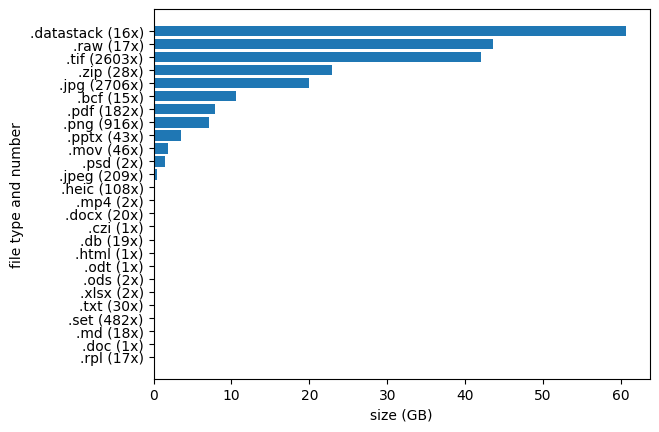

In [ ]:
#|echo: false 
file_extensions = np.array(sorted(list(set(dv.data['ext']) - set([''])))) # exclude directories 

n_bytes_list = []
n_files_list = [] 
for ext in file_extensions: 
    is_ext = dv.data['ext'] == ext  
    n_files = int(is_ext.sum())
    n_files_list.append(n_files)
    n_bytes = dv.data['byte_size'][is_ext].sum() 
    n_bytes_list.append(int(n_bytes))

n_bytes_list = np.array(n_bytes_list)
n_files_list = np.array(n_files_list)

idxs = np.argsort(n_bytes_list)

labels = [f'{ext} ({n}x)' for ext, n in zip(file_extensions[idxs], n_files_list[idxs])]
fig, ax = plt.subplots() 
ax.barh(labels, n_bytes_list[idxs]/ 10**9)
ax.set_xlabel('size (GB)')
ax.set_ylabel('file type and number')
print(f'Falnama-project - Total size: {n_bytes_list.sum() / 10**9:0.2f} GB, Total number of files: {n_files_list.sum()}') 

# FUNCTIONS

In [ ]:
#|export 

pass